In [1]:
# library importation
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random as rnd
import numpy as np

In [2]:
# Assignment 1

In [3]:
# reading of the dataset and organization into an edge list
# (step dependent on the dataset and its structure)
df=pd.read_csv("Euroroad/out2.txt")
for i in range(len(df)):
    df.loc[i,"node1"]=int(df.loc[i,"edge_list"].split(' ')[0])
    df.loc[i,"node2"]=int(df.loc[i,"edge_list"].split(' ')[1])
print("Dataframe:")
display(df)
pointers=[[] for i in range(int(max(df["node2"])))]
for i in range(len(df)):
    pointers[int(df.loc[i,"node1"])-1].append(int(df.loc[i,"node2"]))
    pointers[int(df.loc[i,"node2"])-1].append(int(df.loc[i,"node1"]))
print("Pointers:\n",pointers)
V=[[0,0] for i in range(2*len(df))]
counter=0
for i in range(len(pointers)):
    for j in range(len(pointers[i])):
        V[counter][0]=i+1
        V[counter][1]=pointers[i][j]
        counter+=1
print("Edge list:\n",V)

Dataframe:


,edge_list,node1,node2
0,1 2,1.0,2.0
1,2 3,2.0,3.0
2,2 17,2.0,17.0
3,3 4,3.0,4.0
4,4 5,4.0,5.0
5,4 855,4.0,855.0
6,6 7,6.0,7.0
7,6 880,6.0,880.0
8,7 8,7.0,8.0
9,7 22,7.0,22.0


Pointers:
 [[2], [1, 3, 17], [2, 4], [3, 5, 855], [4], [7, 880], [6, 8, 22, 23, 411, 453, 454, 889], [7, 9, 479, 480, 561], [8, 10, 537, 561, 1074], [9, 11, 536, 561], [10, 12, 560], [11, 13, 27, 30, 559], [12, 14, 596, 1138], [13, 34], [16], [15, 17], [2, 16, 18], [17, 19, 823], [18, 20, 388, 389, 627], [19, 21], [20], [7, 409, 885], [7, 24, 537, 538, 1078, 1109], [23, 25, 1110], [24, 26], [25, 27], [12, 26, 28, 561], [27, 29], [28, 30], [12, 29, 31], [30, 32], [31, 33], [32, 34], [14, 33, 1159], [36, 392], [35, 37, 631], [36, 38, 628, 863, 1011], [37, 39], [38, 40, 412, 413, 628, 875, 876, 881], [39, 41], [40, 42], [41, 43, 876, 881, 882], [42, 44, 50, 51, 411, 454, 455], [43, 45], [44, 46, 888], [45, 47, 485, 889, 1036], [46, 48, 73, 486, 890], [47, 49, 74], [48, 50, 485, 629], [43, 49, 51, 629], [43, 50, 52, 538, 901], [51, 53], [52, 54, 629], [53, 55, 540], [54, 56], [55, 57, 540, 541, 912], [56, 86, 541, 562], [59], [58, 60], [59], [62], [61, 63, 1144], [62], [65, 394, 411, 842],

In [4]:
def assignment1(V):
    # function that takes the edge list as input, and  as outputs:
    # - the number of nodes
    # - the number of links
    # - the average degree
    # - the list of degrees
    N=max(max(V)) # two maxes because the first returns a value for each column
    E=len(V)//2 # because V counts each link twice, for both directions
    D=[0 for i in range(N)]
    for i in range(2*E):
        D[V[i][0]-1]+=1
    k=[0 for i in range(max(D))]
    for i in range(N):
        k[D[i]-1]+=1
    meank1=0
    for i in range(len(k)):
        meank1+=(i+1)*k[i]
    meank1=float(meank1)/float(N) # as an average over the distribution
    meank2=2.0*E/N # using the values of N and E
    return N,E,meank1,meank2,D
result=assignment1(V)
print("N=",result[0])
print("E=",result[1])
print("Average degree, computed in two ways:",result[2],result[3])
print("List of degrees:",result[4])

N= 1174
E= 1417
Average degree, computed in two ways: 2.41396933560477 2.41396933560477
List of degrees: [1, 3, 2, 3, 1, 2, 8, 5, 5, 4, 3, 5, 4, 2, 1, 2, 3, 3, 5, 2, 1, 3, 6, 3, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 3, 5, 2, 8, 2, 2, 5, 7, 2, 3, 5, 5, 3, 4, 4, 5, 2, 3, 3, 2, 5, 4, 1, 2, 1, 1, 3, 1, 4, 5, 2, 2, 4, 6, 6, 2, 4, 3, 2, 3, 2, 3, 2, 2, 2, 6, 2, 3, 4, 3, 4, 1, 2, 2, 4, 2, 2, 4, 1, 3, 2, 2, 2, 2, 5, 4, 2, 3, 2, 5, 6, 8, 3, 3, 6, 2, 3, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 3, 1, 2, 3, 2, 2, 1, 4, 2, 2, 3, 2, 1, 3, 8, 3, 4, 2, 7, 2, 5, 6, 5, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 4, 2, 5, 2, 2, 2, 4, 2, 3, 6, 7, 2, 2, 2, 2, 4, 3, 6, 3, 4, 3, 3, 3, 5, 3, 5, 4, 2, 2, 2, 2, 2, 4, 6, 2, 5, 2, 2, 1, 2, 3, 3, 1, 2, 1, 2, 4, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 4, 4, 3, 2, 4, 5, 3, 3, 8, 3, 3, 2, 5, 5, 3, 2, 2, 2, 5, 2, 1, 2, 2, 1, 2, 5, 5, 2, 2, 2, 2, 4, 2, 2, 4, 2, 3, 6, 2, 3, 3, 4, 4, 2, 2, 2, 2, 2, 3, 5, 3, 3, 6, 4, 2, 1, 10, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 1, 1, 4, 3,

In [5]:
# Assignment 2

Degree distrtibution: [0.16183986371379896, 0.5212947189097104, 0.15843270868824533, 0.09625212947189098, 0.04003407155025554, 0.012776831345826235, 0.004258943781942078, 0.004258943781942078, 0.0, 0.0008517887563884157]


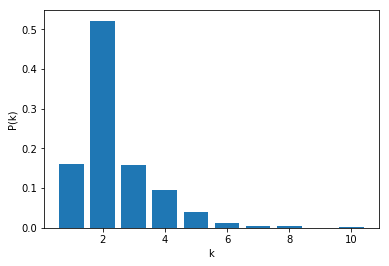

Complementary cumulative degree distrtibution: [0.838160136286201, 0.31686541737649065, 0.15843270868824533, 0.06218057921635434, 0.022146507666098825, 0.009369676320272635, 0.005110732538330609, 0.0008517887563885829, 0.0008517887563885829, 2.220446049250313e-16]
Nearest neighbours degree: [2.6210526315789475, 2.860294117647059, 3.012544802867388, 3.1924778761061945, 3.344680851063832, 3.3666666666666667, 3.7428571428571424, 3.325, 0.0, 2.4]
Average nearest neighbours degree: 2.9088778697168824
<k^2>/<k>: 2.9992942836979544


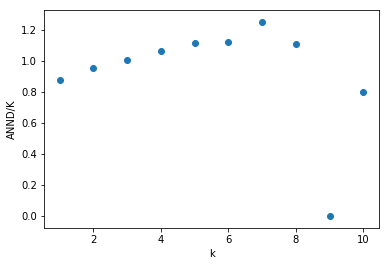

Degree dependent clustering: [0.0, 0.008169934640522876, 0.03046594982078853, 0.05014749262536873, 0.05106382978723404, 0.04, 0.047619047619047616, 0.014285714285714285, 0.0, 0.0]


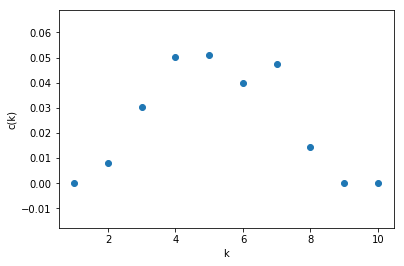

Clustering coefficient: 0.01673156485762959


In [7]:
def assignment2(V):
    # function that takes the edge list as input, and as outputs:
    # - the degree distribution and its graph
    # - the complementary cumulative degree distrtibution
    # - the nearest neighbours degree and its average
    # - the normalization constant of the nearest neighbours degree and its graph
    # - the degree dependent clustering coefficient and its graph
    # - the clustering coefficient of the network
    N=max(max(V))
    E=len(V)//2
    D=[0 for i in range(N)]
    for i in range(2*E):
        D[V[i][0]-1]+=1
    p=[0.0 for i in range(max(D))]
    pc=[0.0 for i in range(max(D))]
    for i in range(N):
        p[D[i]-1]+=1.0
    for i in range(len(p)):
        p[i]=p[i]/N
    pc[0]=p[0]
    for i in range(len(p)):
        pc[i]=pc[i-1]+p[i]
    for i in range(len(p)):
        pc[i]=1.0-pc[i]
    annd=[0.0 for i in range(max(D))]
    meanknn=0.0
    for i in range(len(V)):
        annd[D[V[i][0]-1]-1]+=D[V[i][1]-1]/D[V[i][0]-1]
    for i in range(len(annd)):
        meanknn+=annd[i]
    meanknn=meanknn/N
    norm=0.0
    for i in range(max(D)):
        if (p[i]!=0.0):
            annd[i]=annd[i]/(round(N*p[i]))
            norm+=(i+1)*p[i]*annd[i]
    norm=norm/(2.0*E/N)
    anndnorm=[0.0 for i in range(max(D))]
    for i in range(len(annd)):
        anndnorm[i]=annd[i]/norm
    c=[0.0 for i in range(max(D))]
    C=0
    pointers=[[] for i in range(N)]
    for i,j in V:
        pointers[i-1].append(j)
    for i in range(N):
        for j in pointers[i]:
            for l in pointers[j-1]:
                if((i+1 in pointers[l-1])==True):
                    c[D[i]-1]+=1
    for i in range(1,len(c)): # the loop starts at 1 because links with k=1 (index=0)
                              #don't have clustering,and the calculation would diverge
        if (p[i]!=0.0):
            c[i]=c[i]/(round(N*p[i])*(i+1)*i)
            C+=c[i]*p[i]
    return p,pc,annd,meanknn,norm,anndnorm,c,C
def results2(output):
    # function that takes output of the assignment2 function as input and as output:
    # - prints the results
    # - make plots of the degree distribution, ANND/K and degree dependent clustering
    print("Degree distrtibution:",output[0])
    plt.bar([i+1 for i in range(len(output[0]))],output[0])
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.show()
    print("Complementary cumulative degree distrtibution:",output[1])
    print("Nearest neighbours degree:",output[2])
    print("Average nearest neighbours degree:",output[3])
    print("<k^2>/<k>:",output[4])
    maxD=len(output[0])
    plt.scatter([i+1 for i in range(maxD)],output[5])
    plt.xlabel("k")
    plt.ylabel("ANND/K")
    plt.show()
    print("Degree dependent clustering:",output[6])
    plt.scatter([i+1 for i in range(len(output[6]))],output[6])
    plt.xlabel("k")
    plt.ylabel("c(k)")
    plt.show()
    print("Clustering coefficient:",output[7])
    return
output=assignment2(V)
results2(output)

In [8]:
# Assignment 5

Properties of 1 realization:
Degree distrtibution: [0.16183986371379896, 0.5212947189097104, 0.15843270868824533, 0.09625212947189098, 0.04003407155025554, 0.012776831345826235, 0.004258943781942078, 0.004258943781942078, 0.0, 0.0008517887563884157]


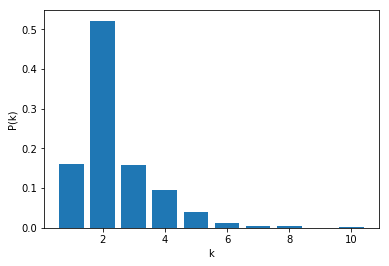

Complementary cumulative degree distrtibution: [0.838160136286201, 0.31686541737649065, 0.15843270868824533, 0.06218057921635434, 0.022146507666098825, 0.009369676320272635, 0.005110732538330609, 0.0008517887563885829, 0.0008517887563885829, 2.220446049250313e-16]
Nearest neighbours degree: [3.0157894736842104, 2.9444444444444446, 3.0232974910394286, 3.0331858407079646, 3.1234042553191506, 3.1777777777777785, 3.257142857142857, 2.675, 0.0, 2.3999999999999995]
Average nearest neighbours degree: 2.9868915794597233
<k^2>/<k>: 2.999294283697954


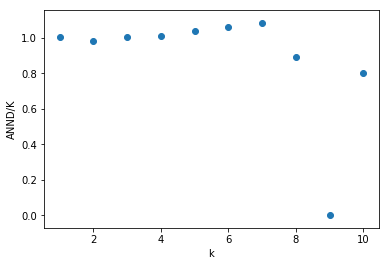

Degree dependent clustering: [0.0, 0.0016339869281045752, 0.0017921146953405018, 0.0, 0.002127659574468085, 0.0, 0.0, 0.0, 0.0, 0.0]


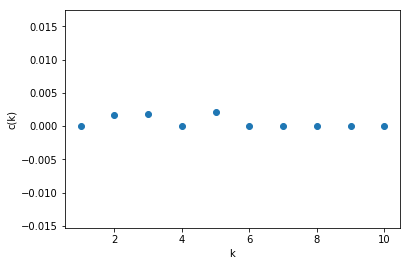

Clustering coefficient: 0.0012208972174900625

Properties of the average over 100 realizations:


C:\Users\usuario\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Degree distrtibution: [0.161839863713799, 0.5212947189097104, 0.15843270868824533, 0.09625212947189096, 0.040034071550255526, 0.012776831345826238, 0.004258943781942079, 0.004258943781942079, 0.0, 0.0008517887563884158, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

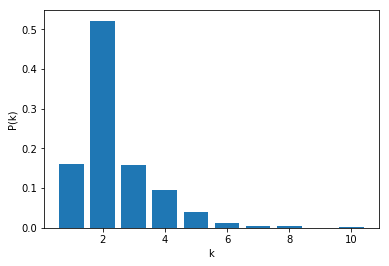

Complementary cumulative degree distrtibution: [0.8381601362862011, 0.31686541737649065, 0.15843270868824533, 0.062180579216354344, 0.02214650766609882, 0.009369676320272635, 0.005110732538330609, 0.0008517887563885829, 0.0008517887563885829, 2.220446049250313e-16, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

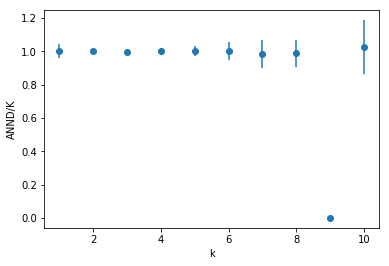

Degree dependent clustering: [0.0, 0.0014869281045751632, 0.0018100358422939067, 0.0013716814159292034, 0.0012765957446808512, 0.0016, 0.0009523809523809525, 0.0019285714285714284, 0.0, 0.0011111111111111111, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

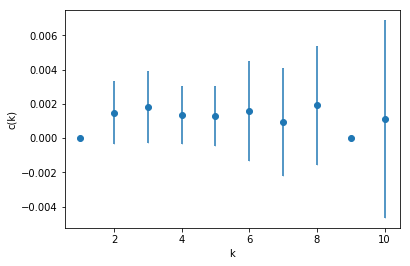

Clustering coefficient: 0.001278690408588194 +- 0.0012243087936776316


In [9]:
def CM(V):
    # function that takes the edge list as input, constructs a configuration model,
    # and returns the new edge list as output
    N=max(max(V))
    E=len(V)//2
    D=[0 for i in range(N+1)] # indexes are defined from 0 to N, not from 0 to N-1 as with assignments 1 and 2, 0th don't matter
    Dc=[0] # cumulative distribution of degrees
    for i in range(2*E):
        D[V[i][0]]+=1
    for i in range(1,N+1):
        Dc.append(Dc[i-1]+D[i])
    pointers=[[] for i in range(N+1)]
    j=0
    while(j in range(E)):
        link1=rnd.randint(1,2*E-2*j)
        link2=rnd.randint(1,2*E-2*j)
        for i in range(1,N+1):
            if(link1>Dc[i-1] and link1<=Dc[i]):
                node1=i
            if(link2>Dc[i-1] and link2<=Dc[i]):
                node2=i
        if(((node1!=node2) and (node1 not in pointers[node2]) and (node2 not in pointers[node1]))==True):
        # conditions to avoid self-loops and repeated links
            pointers[node1].append(node2)
            pointers[node2].append(node1)
            j+=1
            for i in range(node1,N+1):
                Dc[i]-=1
            for i in range(node2,N+1):
                Dc[i]-=1
    Vrnd=[]
    for i in range(1,len(pointers)):
        for j in range(len(pointers[i])):
            Vrnd.append([i,pointers[i][j]])
    return Vrnd
def av(x):
    # function that takes the average of each list of a given list of lists
    y=[]
    for i in range(len(x)):
        y.append(np.average(x[i]))
    return y
def sd(x):
    # function that takes the standard deviation of each list of a given list of lists
    y=[]
    for i in range(len(x)):
        y.append(np.std(x[i]))
    return y
def results100(output):
    # function the works as the results2 function in assignment 2,
    # but adapted to take the averge results over 100 realizations of the configuration model
    print("Degree distrtibution:",av(output[0]))
    plt.bar([i+1 for i in range(len(output[0]))],av(output[0]),yerr=sd(output[0]))
    plt.xlabel("k")
    plt.ylabel("P(k)")
    plt.show()
    print("Complementary cumulative degree distrtibution:",av(output[1]))
    print("Nearest neighbours degree:",av(output[2]))
    print("Average nearest neighbours degree:",np.average(output[3]),"+-",np.std(output[3]))
    print("<k^2>/<k>:",np.average(output[4]),"+-",np.std(output[4]))
    maxD=len(assignment1(V)[4])
    plt.errorbar([i+1 for i in range(maxD)],av(output[5]),yerr=sd(output[5]),fmt="o",capsize=0.1)
    plt.xlabel("k")
    plt.ylabel("ANND/K")
    plt.show()
    print("Degree dependent clustering:",av(output[6]))
    plt.errorbar([i+1 for i in range(len(output[6]))],av(output[6]),yerr=sd(output[6]),fmt="o",capsize=0.1)
    plt.xlabel("k")
    plt.ylabel("c(k)")
    plt.show()
    print("Clustering coefficient:",np.average(output[7]),"+-",np.std(output[7]))
    return
def assignment5(V):
    # function that takes the edge list as input and as outputs
    # and applies the computations of the assigment2 function
    # over the configuration model and the average of 100 realizations of it
    print("Properties of 1 realization:")
    output1=assignment2(CM(V))
    results2(output1)
    print("\nProperties of the average over 100 realizations:")
    maxD=len(assignment1(V)[4])
    output100=[[[] for i in range(maxD)],[[] for i in range(maxD)],[[] for i in range(maxD)],[],[],[[] for i in range(maxD)],[[] for i in range(maxD)],[]]
    for n in range(100):
        output=assignment2(CM(V))
        for k in range(len(output)):
            if (type(output[k])==float):
                output100[k].append(output[k])
            elif (type(output[k])==list):
                for j in range(len(output[k])):
                    output100[k][j].append(output[k][j])
    results100(output100)
    return
assignment5(V)

In [10]:
# things not compulsory but useful to have:

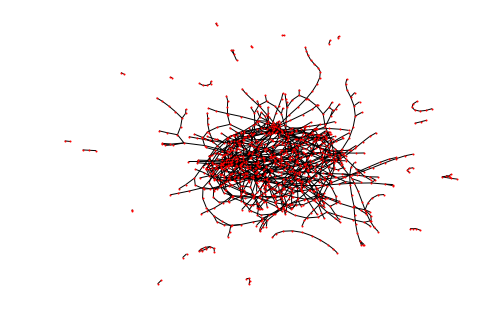

In [11]:
# map of the network
def map(V):
    G=nx.from_edgelist(V)
    nx.draw(G,node_size=1,weight=0.5)
    return
map(V)

In [12]:
# connected edge list (needed for a SIS simulation without isolated nodes)
Gc=nx.from_edgelist(V)
N=max(max(V))
E=len(V)//2
D=[0 for i in range(N)]
for i in range(2*E):
    D[V[i][0]-1]+=1
for i in range(len(D)):
    if(D[i]==max(D)):
        maxkindex=i
connected_set=[]
connected_edgelist=[]
newindex=[0 for i in range(N+1)]
counter=1
for i in range(N):
    if(nx.has_path(Gc,maxkindex+1,i+1)==False):
        Gc.remove_node(i+1)
    else:
        connected_set.append(i+1)
        newindex[i+1]=counter
        counter+=1
V2=[]
for i in range(2*E):
    if(newindex[V[i][0]]!=0):
        V2.append([newindex[V[i][0]],newindex[V[i][1]]])
print(V2)
with open("connected_edgelist.dat", "w") as file:
    for i in range(len(V2)):
        file.write(str(V2[i][0])+" "+str(V2[i][1])+"\n")
file.close()

[[1, 2], [1, 796], [2, 1], [2, 3], [2, 10], [2, 11], [2, 362], [2, 404], [2, 405], [2, 805], [3, 2], [3, 4], [3, 430], [3, 431], [3, 512], [4, 3], [4, 5], [4, 488], [4, 512], [4, 964], [5, 4], [5, 6], [5, 487], [5, 512], [6, 5], [6, 7], [6, 511], [7, 6], [7, 8], [7, 15], [7, 18], [7, 510], [8, 7], [8, 9], [8, 540], [8, 1014], [9, 8], [9, 22], [10, 2], [10, 360], [10, 801], [11, 2], [11, 12], [11, 488], [11, 489], [11, 966], [11, 985], [12, 11], [12, 13], [12, 986], [13, 12], [13, 14], [14, 13], [14, 15], [15, 7], [15, 14], [15, 16], [15, 512], [16, 15], [16, 17], [17, 16], [17, 18], [18, 7], [18, 17], [18, 19], [19, 18], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [22, 9], [22, 21], [22, 1030], [23, 24], [23, 343], [24, 23], [24, 25], [24, 570], [25, 24], [25, 26], [25, 567], [25, 779], [25, 916], [26, 25], [26, 27], [27, 26], [27, 28], [27, 363], [27, 364], [27, 567], [27, 791], [27, 792], [27, 797], [28, 27], [28, 29], [29, 28], [29, 30], [30, 29], [30, 31], [30, 792], [30, 797

N= 1039
E= 1305
Average degree, computed in two ways: 2.512030798845043 2.512030798845043
List of degrees: [2, 8, 5, 5, 4, 3, 5, 4, 2, 3, 6, 3, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 3, 5, 2, 8, 2, 2, 5, 7, 2, 3, 5, 5, 3, 4, 4, 5, 2, 3, 3, 2, 5, 4, 4, 5, 2, 2, 4, 6, 6, 2, 4, 3, 2, 3, 2, 3, 2, 2, 2, 6, 2, 3, 4, 3, 4, 1, 2, 2, 4, 2, 2, 4, 1, 3, 2, 2, 2, 2, 5, 4, 2, 3, 2, 5, 6, 8, 3, 3, 6, 2, 3, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 3, 1, 1, 4, 2, 2, 3, 2, 1, 3, 8, 3, 4, 2, 7, 2, 5, 6, 5, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 4, 2, 5, 2, 2, 2, 4, 2, 3, 6, 7, 2, 2, 2, 2, 4, 3, 6, 3, 4, 3, 3, 3, 5, 3, 5, 4, 2, 2, 2, 2, 2, 4, 6, 2, 5, 2, 2, 1, 2, 3, 3, 1, 2, 4, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 4, 4, 3, 2, 4, 5, 3, 3, 8, 3, 3, 2, 5, 5, 3, 2, 2, 2, 5, 2, 1, 2, 5, 5, 2, 2, 2, 2, 4, 2, 2, 4, 2, 3, 6, 2, 3, 3, 4, 4, 2, 2, 2, 2, 2, 3, 5, 3, 3, 6, 4, 2, 1, 10, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 1, 1, 4, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 3, 4, 4, 2, 2, 2, 

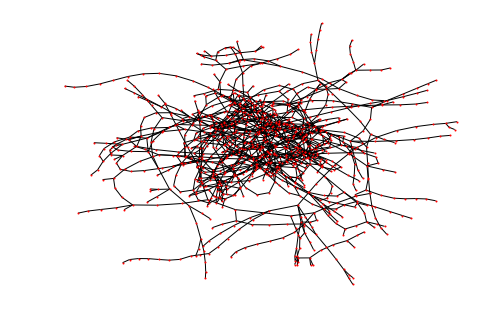

In [14]:
# connected network, characterization and map
result=assignment1(V2)
print("N=",result[0])
print("E=",result[1])
print("Average degree, computed in two ways:",result[2],result[3])
print("List of degrees:",result[4])
nx.draw(Gc,node_size=1,weight=0.5)

In [15]:
# average shortest path lenght for the connected network
print(nx.average_shortest_path_length(Gc))

18.39514614059391
